In [1]:
import pandas as pd
import seaborn as sns

sns.set_theme(palette="deep")

mmlu_entropy_df = pd.read_csv(
    "../../../data/out/single_token_entropy/mmlu_qwen_3b_w_fallback_if_unknown.tsv",
    sep="\t",
    header=0,
    dtype={"entropy_ans_qwen2": "str"},
)

In [2]:
mmlu_entropy_df.value_counts("entropy_ans_qwen2", dropna=False)

entropy_ans_qwen2
9    1991
1    1716
8    1680
2    1489
5    1381
3    1238
4     909
7     824
6     491
0     313
Name: count, dtype: int64

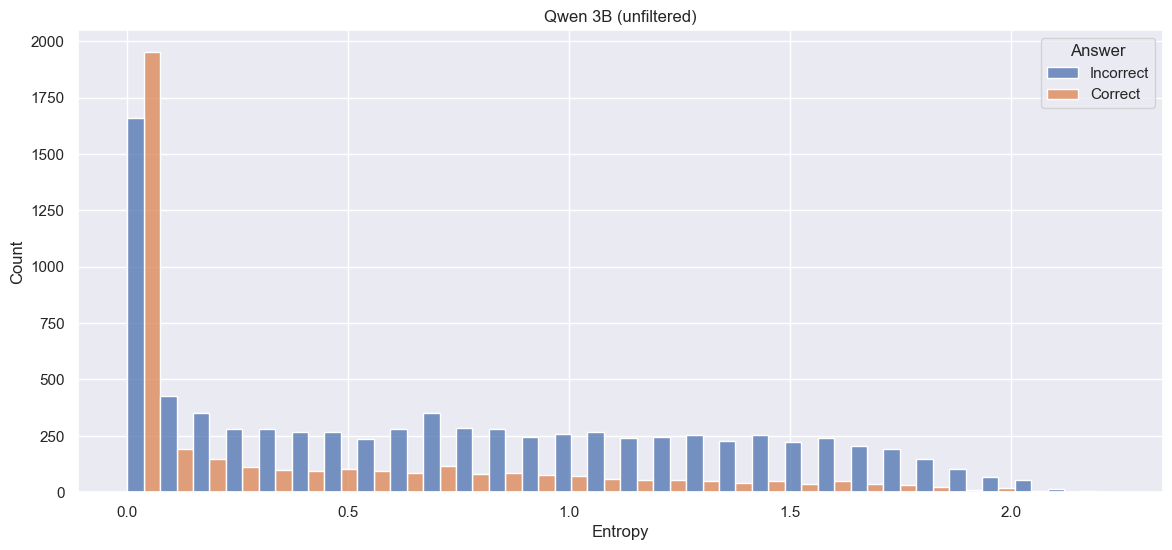

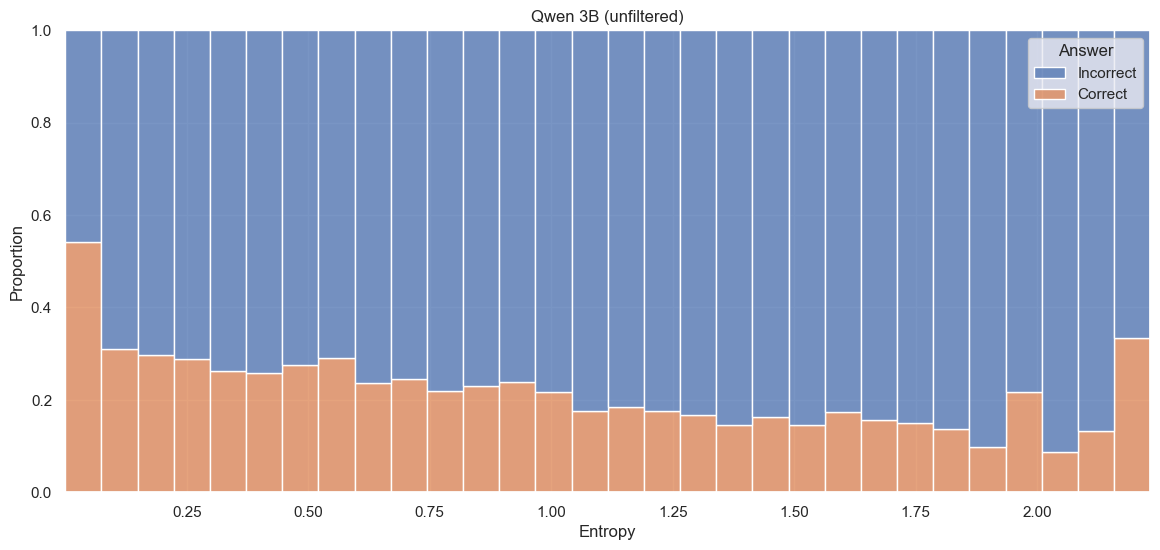

In [3]:
from reasoning_fine_tune.analysis.visualize_entropy_all import visualize_entropy_all

visualize_entropy_all(
    mmlu_entropy_df, "entropy_value_qwen2", "entropy_ans_correct_qwen2", model_name="Qwen 3B (unfiltered)"
)

In [4]:
from reasoning_fine_tune.utils.validation import keep_only_valid_and_known_answers

mmlu_entropy_df = keep_only_valid_and_known_answers(mmlu_entropy_df, "entropy_ans_qwen2")
mmlu_entropy_df.value_counts("entropy_ans_qwen2", dropna=False)

entropy_ans_qwen2
9    1991
1    1716
8    1680
2    1489
5    1381
3    1238
4     909
7     824
6     491
Name: count, dtype: int64

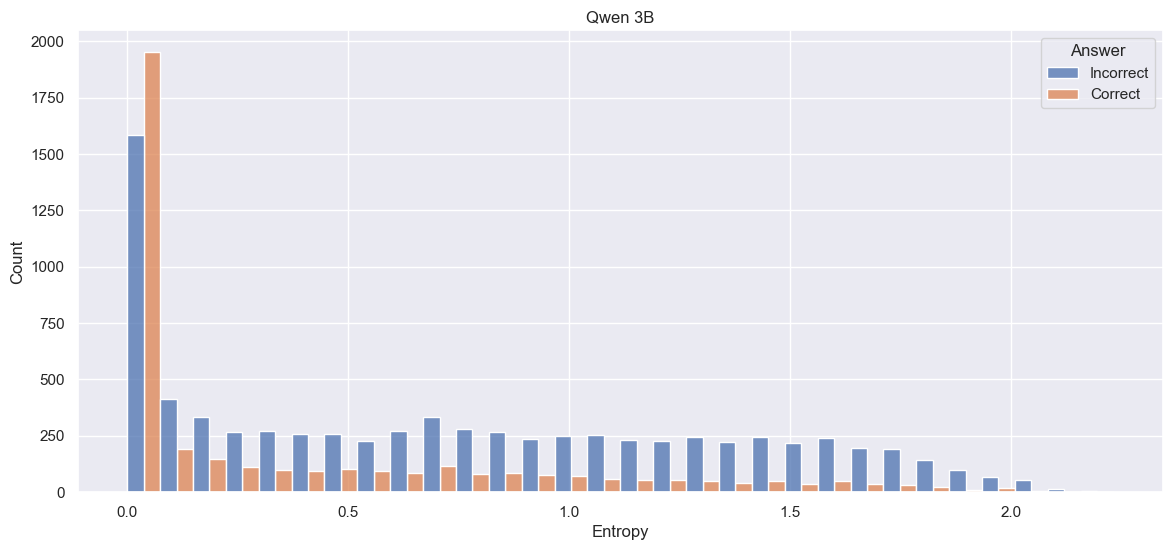

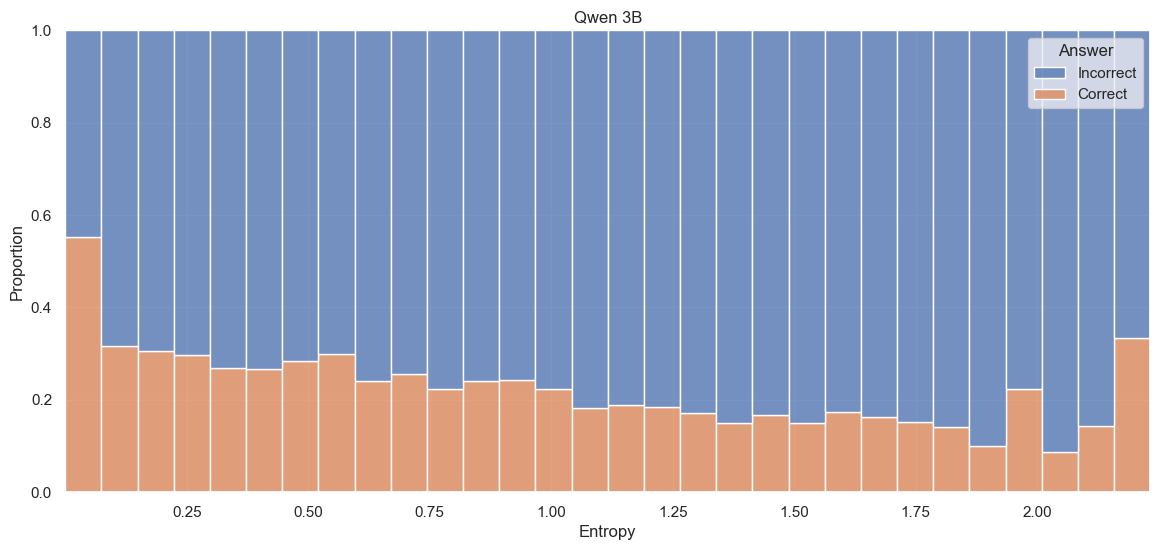

In [5]:
from reasoning_fine_tune.analysis.visualize_entropy_all import visualize_entropy_all

visualize_entropy_all(mmlu_entropy_df, "entropy_value_qwen2", "entropy_ans_correct_qwen2", model_name="Qwen 3B")

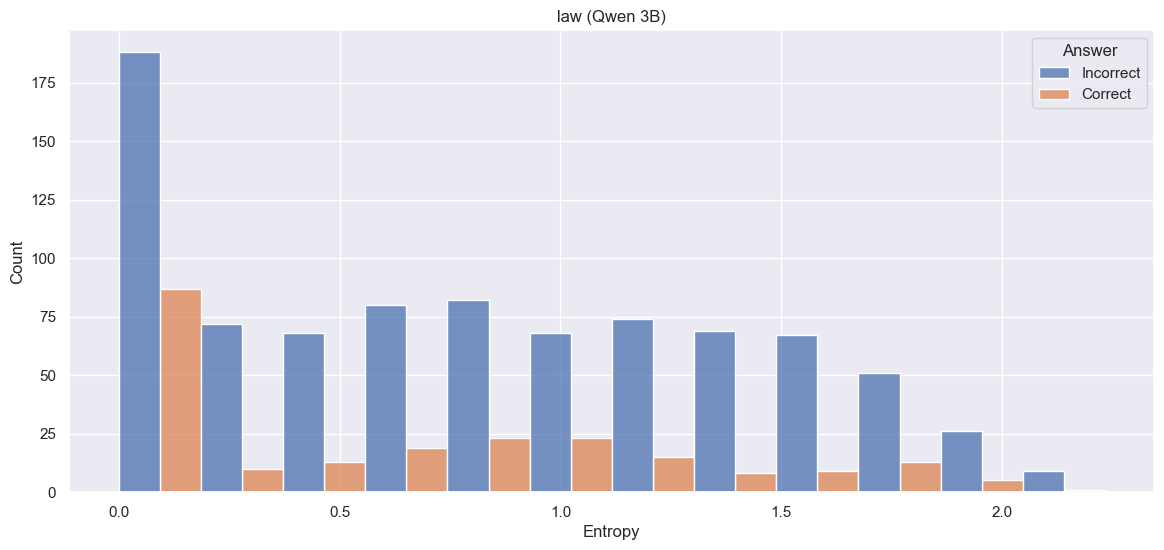

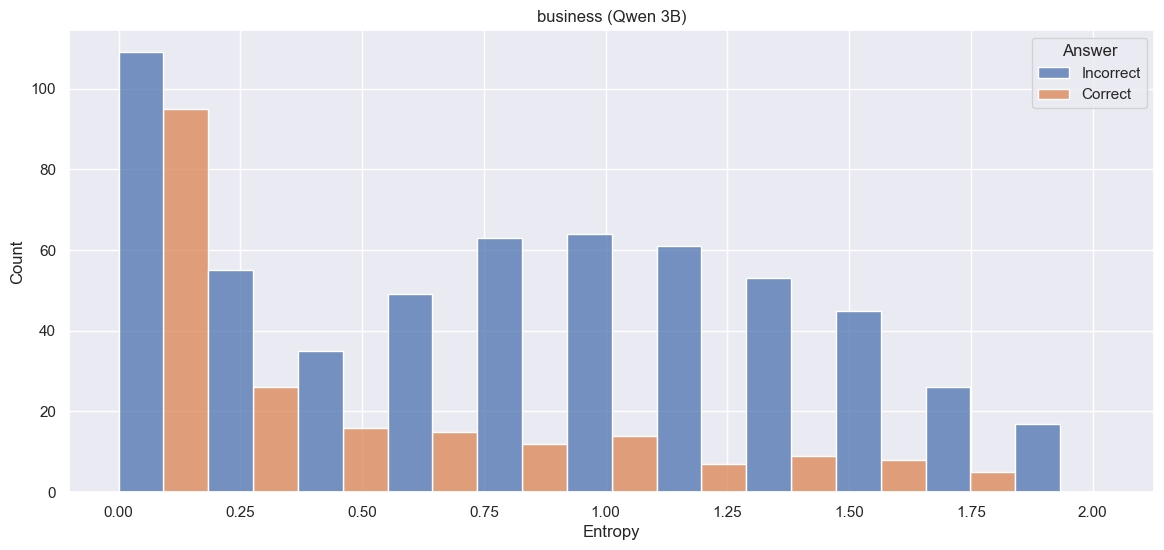

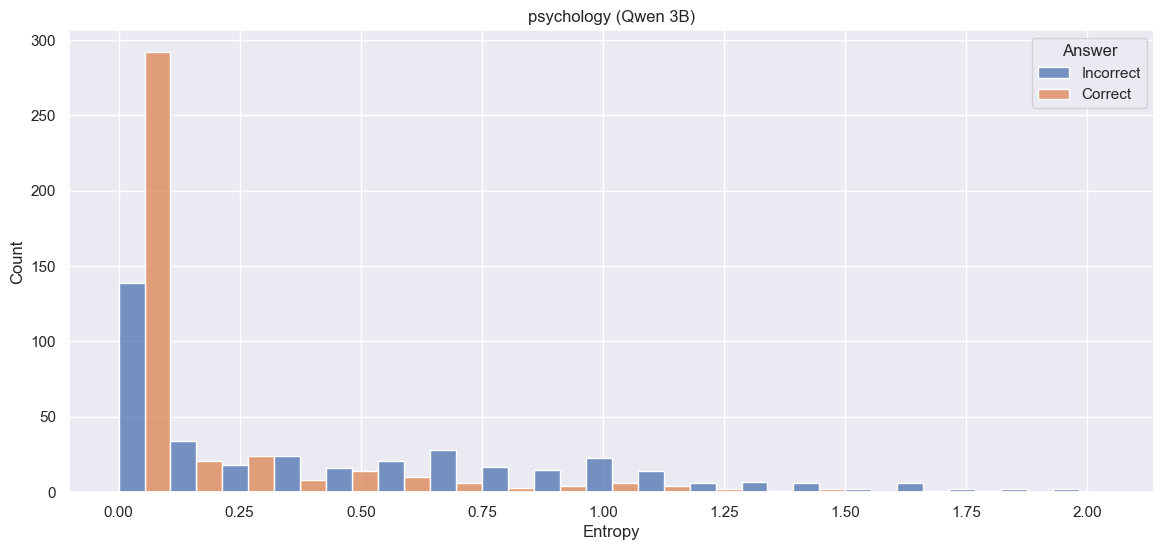

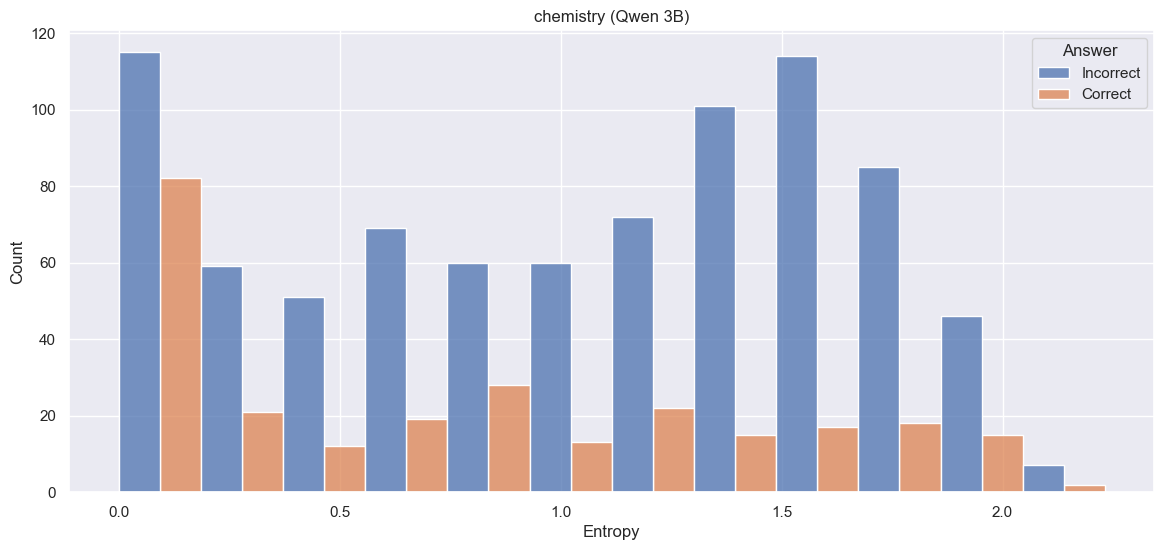

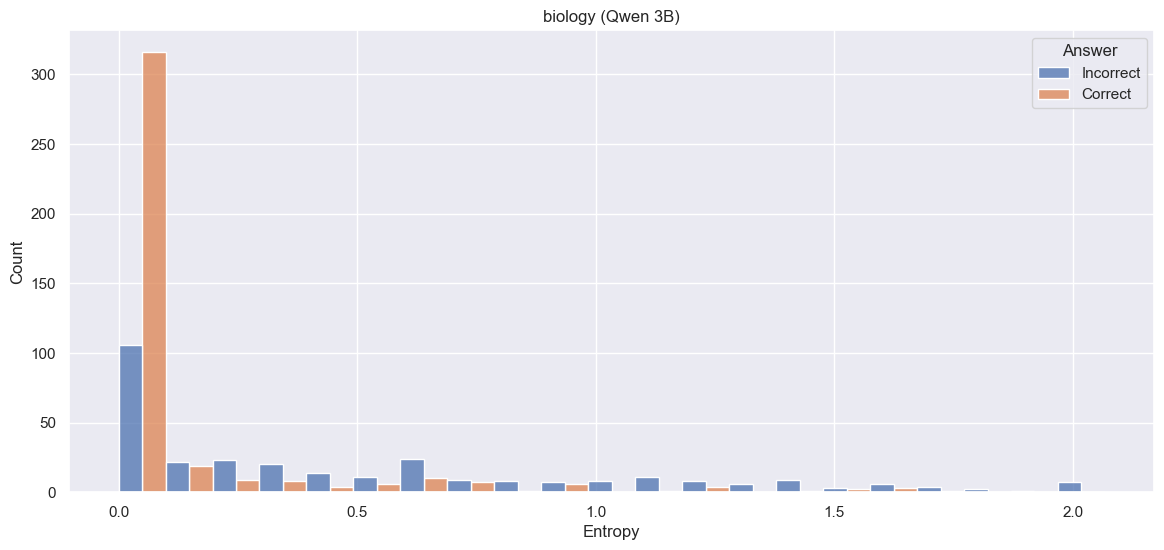

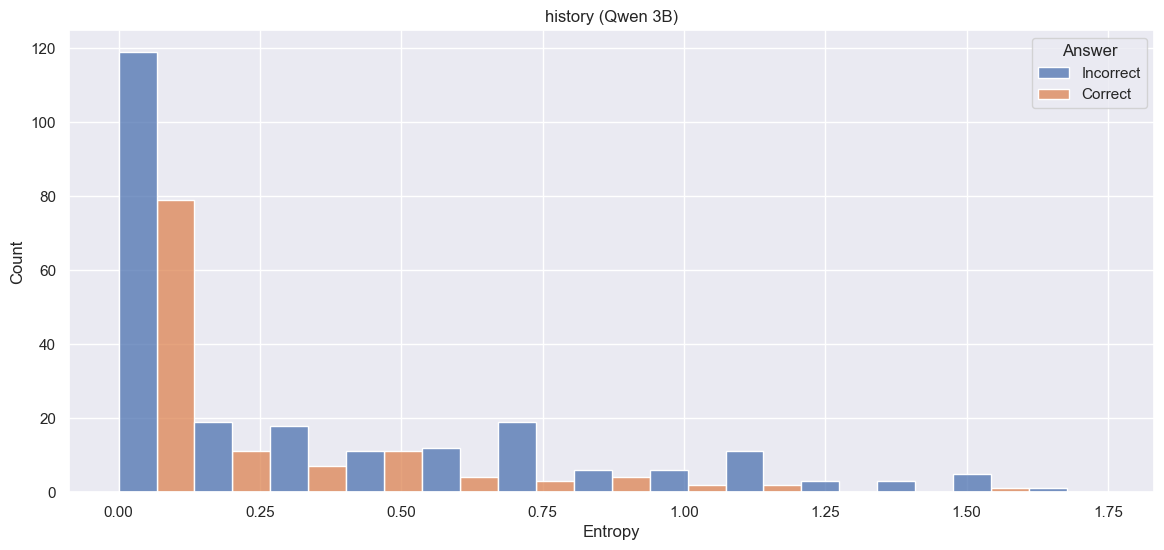

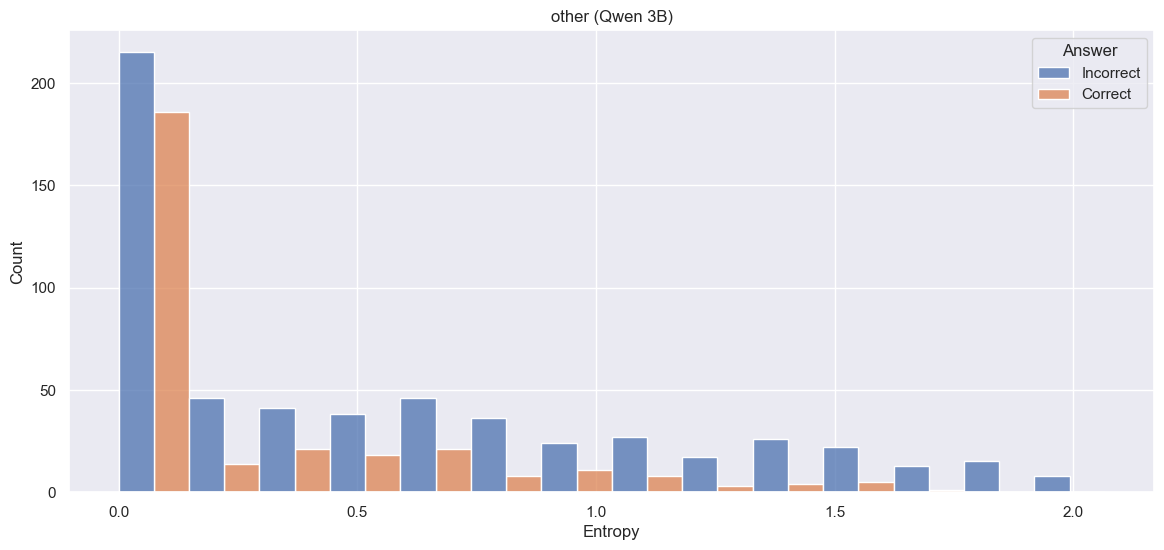

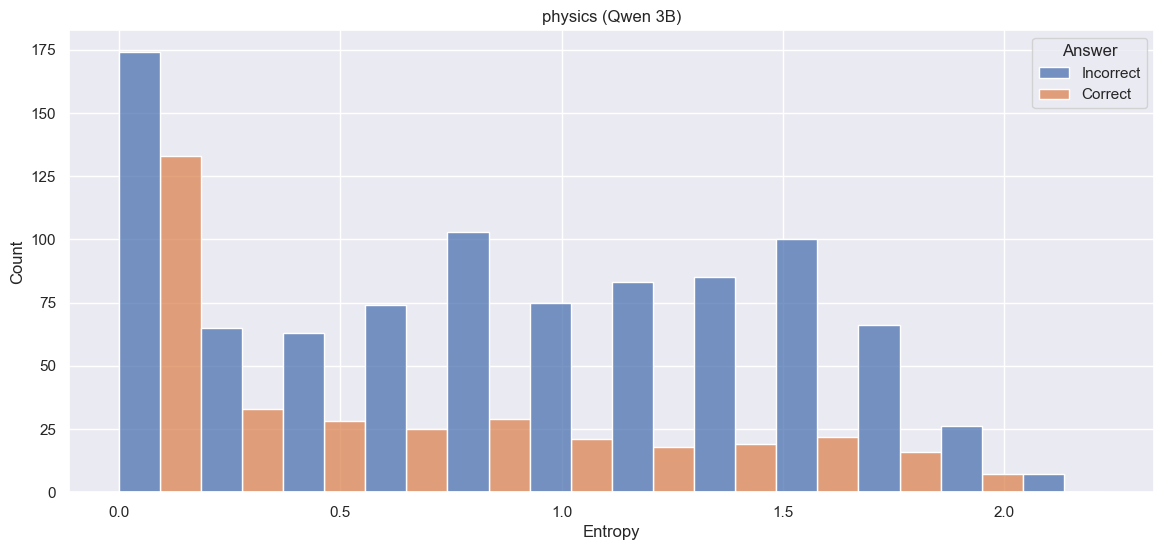

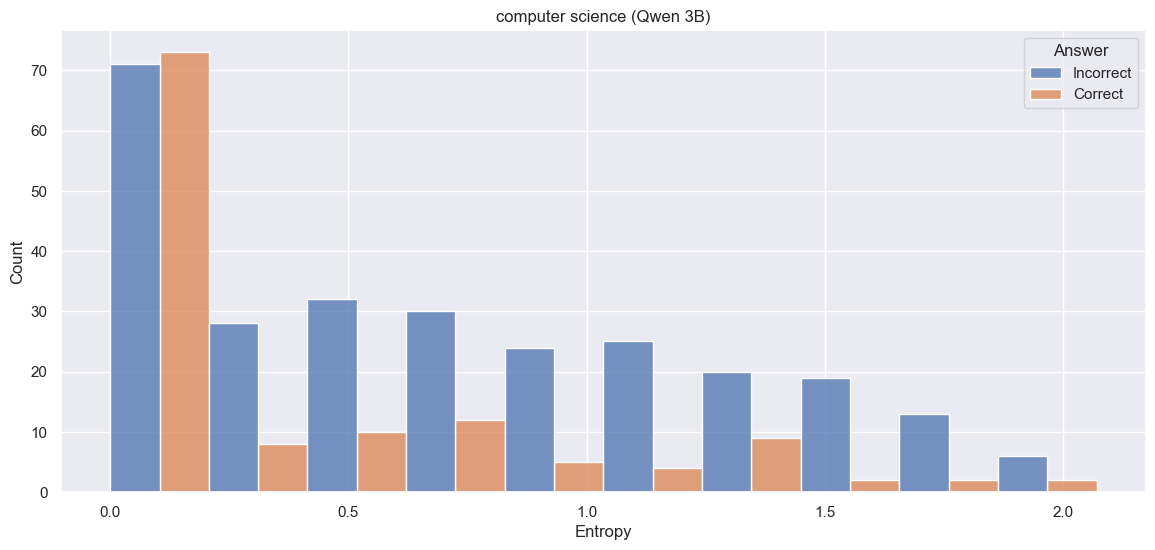

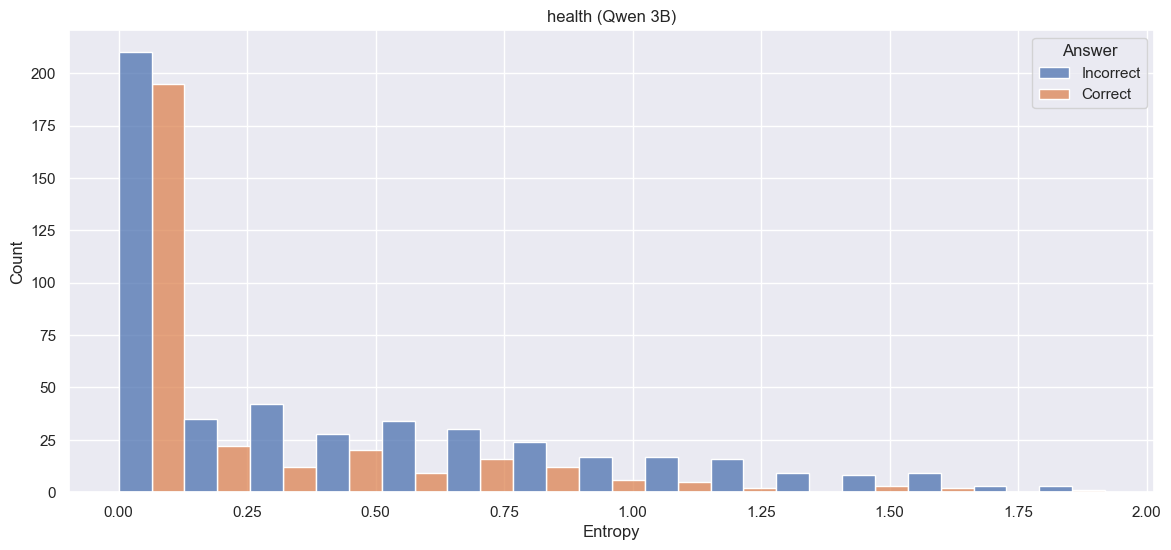

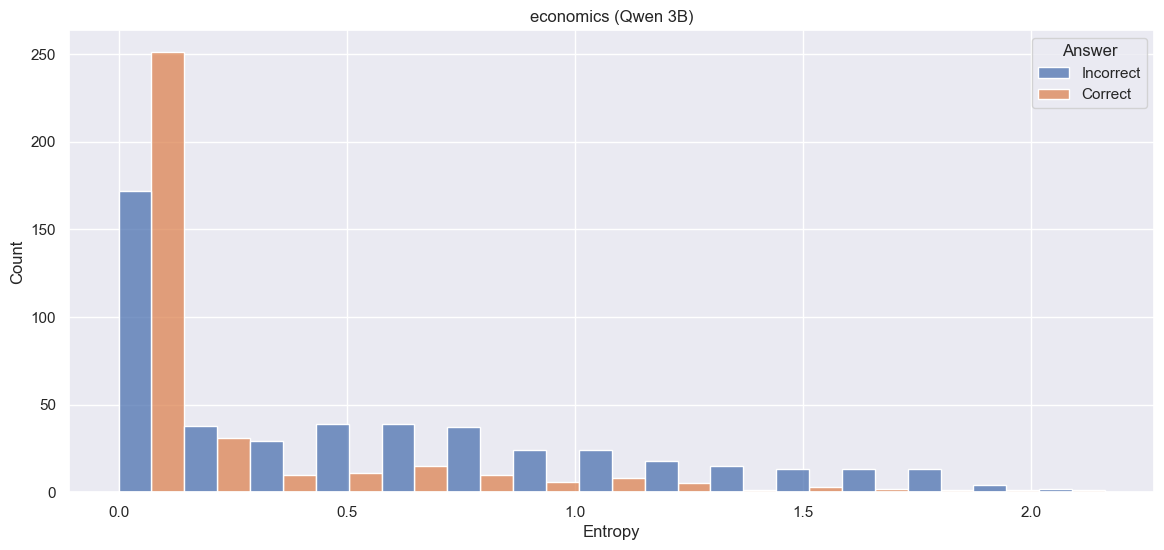

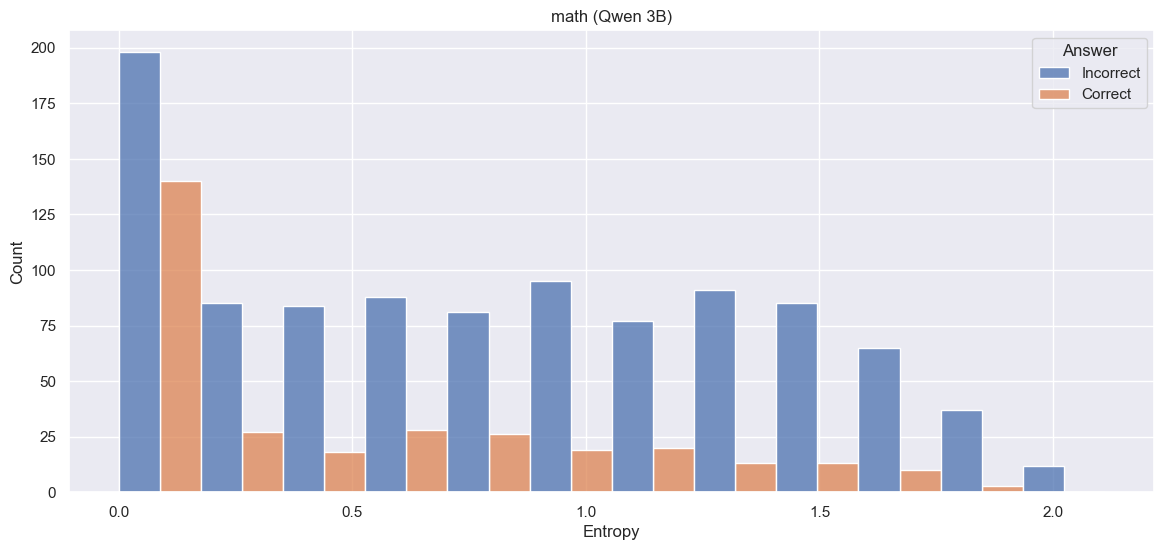

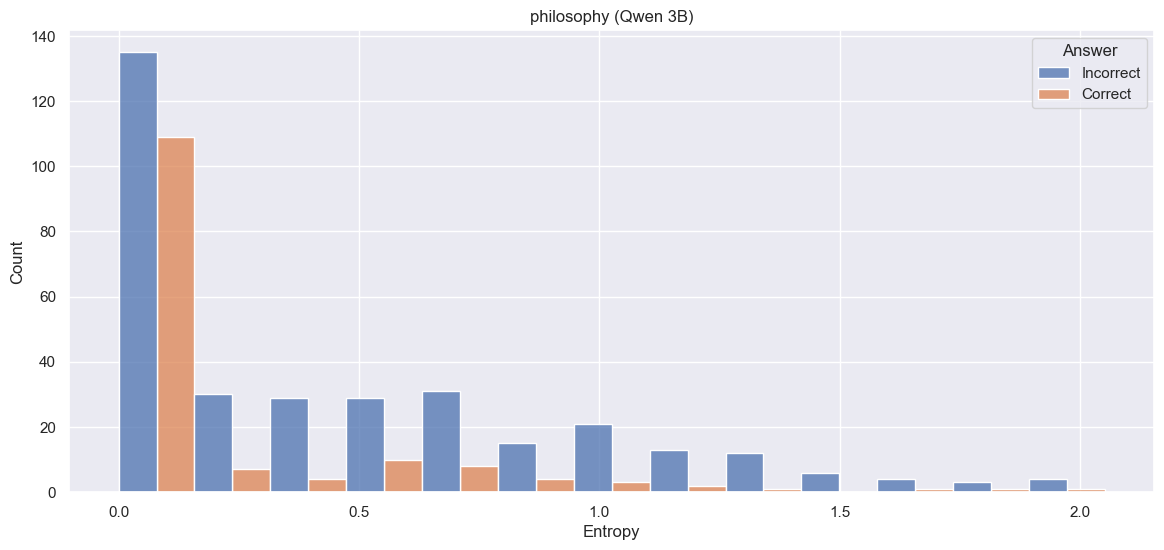

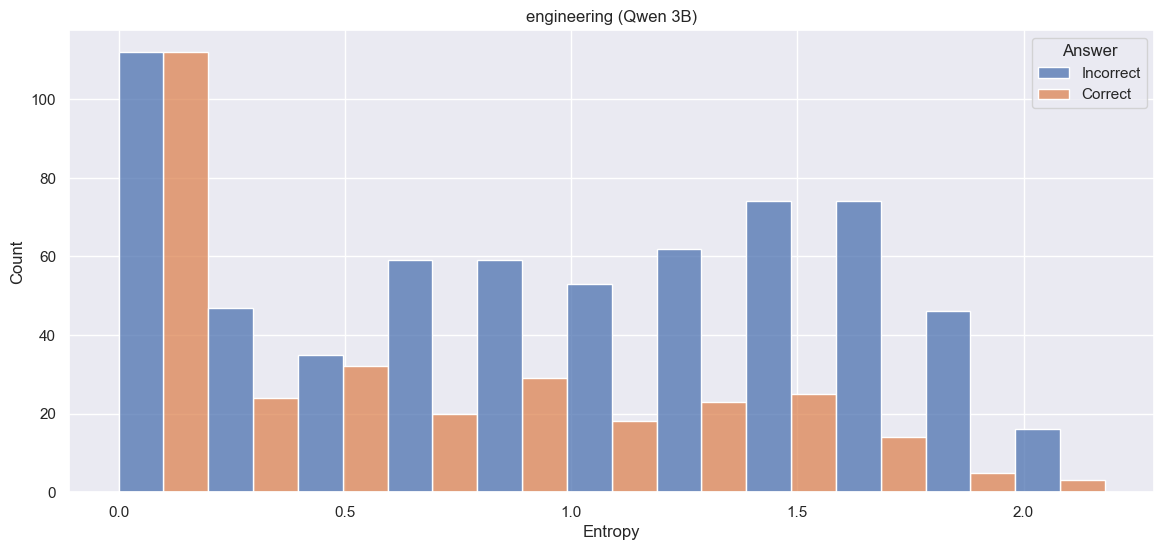

In [6]:
from reasoning_fine_tune.analysis.visualize_entropy_by_category import visualize_entropy_by_category

visualize_entropy_by_category(
    mmlu_entropy_df, "category", "entropy_value_qwen2", "entropy_ans_correct_qwen2", model_name="Qwen 3B"
)